In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

DATA_PATH = 'gdrive/My Drive/NN Capstone/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
pip install OpenEXR

  Stored in directory: /root/.cache/pip/wheels/41/06/9f/c7dc838815b0e7dfc7d7dc19cc3d677edb47594d8489adc62a
Successfully built OpenEXR


In [0]:
import pandas as pd
import matplotlib
import numpy as np
import numpy
import OpenEXR
import Imath
import matplotlib.pyplot as plt
import glob
import os

In [0]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [0]:
def crop_center_3d(img,cropx,cropy,cropz):
    z,y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    startz = z//2-(cropz//2)
    return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

In [7]:

INPUT_DATA_PATH = DATA_PATH + 'DataSet/species_2/'
for i in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','25','26','27','28','29']:
  x_train = []
  for view in glob.iglob(DATA_PATH + 'Generated_Foraminifera/species_2/specimen_' + i + '/Views/*.exr'):
    #input_list = []
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    cube = OpenEXR.InputFile(view)
    #cube.header() shows the header of the exr file. It will show all channel names and data type.
    dw = cube.header()['dataWindow']
    size = (dw.max.x - dw.min.x +1, dw.max.y - dw.min.y +1)
    cube.header()

    #show normal vectors
    redstr= cube.channel('normal.R',pt)
    greenstr= cube.channel('normal.G',pt)
    bluestr= cube.channel('normal.B',pt)
    red = numpy.fromstring(redstr, dtype=numpy.float32)
    blue = numpy.fromstring(bluestr, dtype=numpy.float32)
    green = numpy.fromstring(greenstr, dtype=numpy.float32)
    red.shape = (size[1],size[0])
    blue.shape = (size[1],size[0])
    green.shape = (size[1],size[0])
    img = numpy.stack((red,blue,green),axis=2)
    img += 1
    img /= 2
    img *= 255
    img = img.astype(numpy.uint8)
    #plt.imshow(img,cmap='jet',interpolation='nearest')
    #plt.show()
    #print(img.shape)
    image_crop = np.sum(img,axis=2)
    image_crop = np.rint(np.divide(image_crop,3))
    image_crop = image_crop.astype(numpy.uint8)
    normal_img = crop_center(image_crop,256,256)
    #print("normal image shape ",normal_img.shape )
    #plt.imshow(normal_img,cmap='gray',interpolation='nearest')
    #plt.show()

    #show depth
    greystr= cube.channel('distance.Y',pt)
    grey = numpy.fromstring(greystr, dtype=numpy.float32)
    grey.shape = (size[1],size[0])
    image_crop = grey.astype(numpy.uint8)
    grey_img = crop_center(image_crop,256,256)
    #plt.imshow(grey,cmap='hot',interpolation='nearest')
    #plt.show()
    #print("depth image shape ",grey_img.shape ) 

    #show silhouette
    grey = grey.astype(int)
    sil = numpy.array([1 if i > 0 else 0 for i in np.nditer(grey)])
    sil = sil.reshape(512,512)
    image_crop = sil.astype(numpy.uint8)
    sil_img = crop_center(image_crop,256,256)
    #plt.imshow(sil_img, cmap='Greys')
    #plt.show()
    #print("silhouette shape ",sil_img.shape)

    input_1 = np.multiply(normal_img, sil_img)
    input_2 = np.multiply(grey_img, sil_img)
    input_data = np.concatenate((input_1,input_2),axis=1)
    print(input_data.shape)
    base=os.path.basename(view)
    file = os.path.splitext(base)[0]
    x_train.append(list(input_data))
    #np.save(INPUT_DATA_PATH+'X_' + i ,input_1)
    #np.save(INPUT_DATA_PATH+file+'_d',input_2)
    #np.save(INPUT_DATA_PATH+file+'_s',sil_img)
  X = np.array(x_train)
  np.save(INPUT_DATA_PATH+'X_' + i,X)
  print(X.shape, INPUT_DATA_PATH+'X_' + i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(50, 256, 512) gdrive/My Drive/NN Capstone/DataSet/species_2/X_01
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)
(256, 512)

In [0]:
path = DATA_PATH + 'DataSet/species_1/'

X = np.array(x_train)
np.save(path+'X_00',X)
X.shape

(50, 256, 512)

In [0]:
label = np.load(path + 'Y_00.npy')
label.shape

(128, 128, 128)

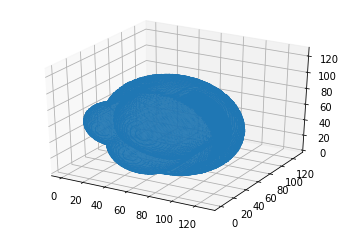

In [0]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.voxels(label)

# plt.show()

In [0]:
x_train = X[:30]
x_train.shape
x_val = X[30:40]
x_val.shape
x_test = X[40:50]
x_test.shape

(10, 256, 512)

In [0]:
import numpy as np
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D , Dropout,Conv3D, MaxPooling3D, Input, Deconv3D, BatchNormalization, Activation, Reshape
from keras.utils import to_categorical
from keras import optimizers

In [0]:
filters_in = [32,64,96]
kernel_size = [16,36,40]
strides = (4,4,4)
def encoder2D(kernel_size, strides):
    inputs = Input(shape=(256,512,1))

    g1 = Conv2D(filters=filters_in[0], kernel_size=kernel_size[0])(inputs)
    g1 = MaxPooling2D(pool_size=2)(g1)
    g1 = Activation(activation='relu')(g1)

    g2 = Conv2D(filters=filters_in[1], kernel_size=kernel_size[1])(g1)
    g2 = MaxPooling2D(pool_size=2)(g2)
    g2 = Activation(activation='relu')(g2)

    g3 = Conv2D(filters=filters_in[2], kernel_size=kernel_size[2])(g2)
    g3 = MaxPooling2D(pool_size=2)(g3)
    g3 = Activation(activation='relu')(g3)

#     g4 = Conv2D(filters=filters_in[3], kernel_size=kernel_size[3])(g3)
#     g4 = MaxPooling2D(pool_size=2)(g4)
#     g4 = Activation(activation='relu')(g4)

#     g5 = Conv2D(filters=filters_in[4], kernel_size=kernel_size[4])(g4)
#     g5 = MaxPooling2D(pool_size=2)(g5)
#     g5 = Activation(activation='sigmoid')(g5) 
    
    g5 = Flatten()(g3)
    
    g6 = Dense(400,activation='sigmoid')(g5)
    g6 = Activation(activation='sigmoid')(g6) 
    
    g7 = Dense(200,activation='sigmoid')(g6)
    g7 = Activation(activation='sigmoid')(g7) 
    
    g8 = Reshape((1, 1,1,200), input_shape=(200,))(g7)
    
    
    model = Model(inputs=inputs, outputs=g8)
    model.summary()

    return model 
encoder2D = encoder2D(kernel_size,strides)  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_63 (InputLayer)        (None, 256, 512, 1)       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 241, 497, 32)      8224      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 120, 248, 32)      0         
_________________________________________________________________
activation_272 (Activation)  (None, 120, 248, 32)      0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 85, 213, 64)       2654272   
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 42, 106, 64)       0         
_________________________________________________________________
activation_273 (Activation)  (None, 42, 106, 64)       0         
__________

In [0]:
kernel_size = [10,16,32,31]
strides = (2,2,2)
def generator(kernel_size, strides):
    inputs = Input(shape=(1, 1, 1, 200))

    g1 = Deconv3D(filters=256, kernel_size=kernel_size[0],strides=strides)(inputs)
    g1 = BatchNormalization()(g1)
    g1 = Activation(activation='relu')(g1)

    g2 = Deconv3D(filters=128, kernel_size=kernel_size[1],strides=strides)(g1)
    g2 = BatchNormalization()(g2)
    g2 = Activation(activation='relu')(g2)

    g3 = Deconv3D(filters=64, kernel_size=kernel_size[2],strides=strides)(g2)
    g3 = BatchNormalization()(g3)
    g3 = Activation(activation='relu')(g3)

#     g4 = Deconv3D(filters=64, kernel_size=kernel_size[3])(g3)
#     g4 = BatchNormalization()(g4)
#     g4 = Activation(activation='relu')(g4)

    g5 = Deconv3D(filters=1, kernel_size=kernel_size[3])(g3)
    g5 = BatchNormalization()(g5)
    g5 = Activation(activation='sigmoid')(g5) 

    model = Model(inputs=inputs, outputs=g5)
    model.summary()

    return model 
generator = generator(kernel_size,strides)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_transpose_110 (Conv3D (None, 10, 10, 10, 256)   51200256  
_________________________________________________________________
batch_normalization_109 (Bat (None, 10, 10, 10, 256)   1024      
_________________________________________________________________
activation_277 (Activation)  (None, 10, 10, 10, 256)   0         
_________________________________________________________________
conv3d_transpose_111 (Conv3D (None, 34, 34, 34, 128)   134217856 
_________________________________________________________________
batch_normalization_110 (Bat (None, 34, 34, 34, 128)   512       
_________________________________________________________________
activation_278 (Activation)  (None, 34, 34, 34, 128)   0         
__________

In [0]:
def create_model():
  model = Sequential()
  model.add(encoder2D)
  model.add(generator)
  model.summary()
  model.compile(optimizer = 'adam', loss=['binary_crossentropy'], metrics=['mse'])
  return model

model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_51 (Model)             (None, 1, 1, 1, 200)      13840792  
_________________________________________________________________
model_52 (Model)             (None, 128, 128, 128, 1)  455762053 
Total params: 469,602,845
Trainable params: 469,601,947
Non-trainable params: 898
_________________________________________________________________


In [0]:
def generator(x_train,y,batch_size=2):
  idx=0
  while(True):
    batch = x_train[idx:idx+2]
    label = np.concatenate((y,y),axis=0)
    batch = batch.reshape(2,256,512,1)
    label = label.reshape(2,128,128,128,1)
    
    print(batch.shape, label.shape)
    yield (batch,label)
  

In [0]:
model.fit_generator(generator(x_train,label,2),verbose=2,steps_per_epoch=1,epochs =1)

Epoch 1/1
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)
(2, 256, 512, 1) (2, 128, 128, 128, 1)


ResourceExhaustedError: ignored

In [0]:
def work(foo):
    foo.work()

pool.apply_async(work,args=(foo,))